In [0]:
from keras.datasets import cifar10
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import keras
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [0]:
(trainX, trainY), (testX, testY) = cifar10.load_data()

170500096/170498071 [==============================] - 4s 0us/step


In [0]:
trainX.shape, testX.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [0]:
num_classes = 10

In [0]:
trainY = keras.utils.to_categorical(trainY, num_classes)
testY = keras.utils.to_categorical(testY, num_classes)

In [0]:
# model = Sequential()
# model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
# model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
# model.add(MaxPooling2D((2, 2)))
# model.add(Flatten())
# model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
# model.add(Dense(10, activation='softmax'))
# # compile model
# opt = keras.optimizers.SGD(lr=0.001, momentum=0.9)
# model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# model = Sequential()
# model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
# model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
# model.add(MaxPooling2D((2, 2)))
# model.add(Dropout(0.2))
# model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
# model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
# model.add(MaxPooling2D((2, 2)))
# model.add(Dropout(0.2))
# model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
# model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
# model.add(MaxPooling2D((2, 2)))
# model.add(Dropout(0.2))
# model.add(Flatten())
# model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
# model.add(Dropout(0.2))
# model.add(Dense(10, activation='softmax'))
# # compile model
# opt = keras.optimizers.SGD(lr=0.001, momentum=0.9)
# model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# model = Sequential()
# model.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3), padding='same', activation='relu', kernel_constraint=maxnorm(3)))
# model.add(Dropout(0.2))
# model.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
# model.add(MaxPooling2D())
# model.add(Flatten())
# model.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)))
# model.add(Dropout(0.5))
# model.add(Dense(num_classes, activation='softmax'))

model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=trainX.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [0]:
model.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_59 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
activation_49 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_60 (Conv2D)           (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_50 (Activation)   (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_19 (Dropout)         (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_61 (Conv2D)           (None, 15, 15, 64)      

In [0]:
opt = keras.optimizers.RMSprop(lr=0.0001, decay=1e-6)
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [0]:
history = model.fit(trainX,trainY,
              epochs=50,
              validation_split=0.2,
              batch_size=32,
              shuffle=True,verbose=1)

Train on 40000 samples, validate on 10000 samples
Epoch 1/50
40000/40000 [==============================] - 19s 471us/step - loss: 4.7449 - acc: 0.2474 - val_loss: 1.6393 - val_acc: 0.4217
Epoch 2/50
40000/40000 [==============================] - 17s 425us/step - loss: 1.5859 - acc: 0.4274 - val_loss: 1.4185 - val_acc: 0.4979
Epoch 3/50
40000/40000 [==============================] - 17s 419us/step - loss: 1.4240 - acc: 0.4939 - val_loss: 1.2442 - val_acc: 0.5678
Epoch 4/50
40000/40000 [==============================] - 17s 416us/step - loss: 1.3233 - acc: 0.5280 - val_loss: 1.2221 - val_acc: 0.5680
Epoch 5/50
40000/40000 [==============================] - 17s 414us/step - loss: 1.2656 - acc: 0.5565 - val_loss: 1.2748 - val_acc: 0.5461
Epoch 6/50
40000/40000 [==============================] - 16s 411us/step - loss: 1.2156 - acc: 0.5716 - val_loss: 1.1198 - val_acc: 0.6152
Epoch 7/50
40000/40000 [==============================] - 16s 412us/step - loss: 1.1719 - acc: 0.5900 - val_loss: 1.

In [0]:
def show_graph(history):
  plt.plot(history.history['loss'],color='blue',label='Train Loss')
  plt.plot(history.history['val_loss'],color='red',label='Valid Loss')
  plt.title('Loss')
  plt.legend()
  plt.xlabel('No. of epochs')
  plt.ylabel('Loss')
  plt.show()
  plt.plot(history.history['acc'],color='blue',label='Train Accuracy')
  plt.plot(history.history['val_acc'],color='red',label='Valid Accuracy')
  plt.legend()
  plt.title('Accuracy')
  plt.xlabel('No. of epochs')
  plt.ylabel('Accuracy')
  plt.show()

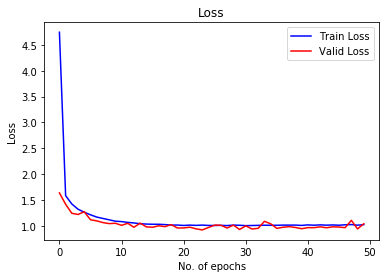

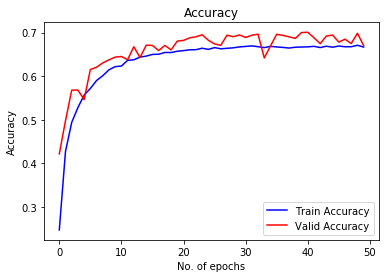

In [0]:
show_graph(history)

In [0]:
test_loss, test_acc = model.evaluate(testX, testY)
test_loss , test_acc

10000/10000 [==============================] - 2s 166us/step


(1.0405910354614258, 0.6776)